# 11 jobs Python `random` can do for you

Code for the following Medium article: [UPDATE](https://medium.com/@pawjast)

**References:**

1. [https://docs.python.org/3/library/random.html](https://docs.python.org/3/library/random.html)

## Imports

In [1]:
import random
import math
from typing import Tuple
import matplotlib.pyplot as plt

## Histogram plot function

A utility function to visualize the output of the distributions.

In [2]:
def my_hist(ax: plt.Axes=None, values: list=None, title: str="Title") -> Tuple[plt.Figure, plt.Axes]:
    """Plot histogram with custom settings"""
    gnome_colour_1 = "#8ff0a4"  # GNOME green 1
    gnome_colour_5 = "#26a269"  # GNOME green 5
    
    if ax:
        fig=plt.gcf()
    else:
        fig, ax = plt.subplots(
        figsize=(16, 9),
        facecolor="white"
    )

    # histogram
    ax.hist(
        values,
        bins=50,
        facecolor=gnome_colour_1,
        edgecolor=gnome_colour_5,
        histtype="stepfilled"
    )

    # labels
    ax.set_title(
        title,
        fontsize = 18
    )
    ax.set_xlabel(
        "Generated values",
        fontsize = 14
    )
    ax.set_ylabel(
        "Count",
        fontsize = 14
    )
    # Update font size of the 'x' and 'y' axis labels
    ax.tick_params(
        axis="both",
        labelsize=14
    )

    # Remove spines
    for position in ["top", "right"]:
        ax.spines[position].set_visible(False)

    return fig, ax


## Generate random `float`

### uniform `float`: in a range `<0, 1)`

In [3]:
# Generate one number
random.random()

0.67502741938157

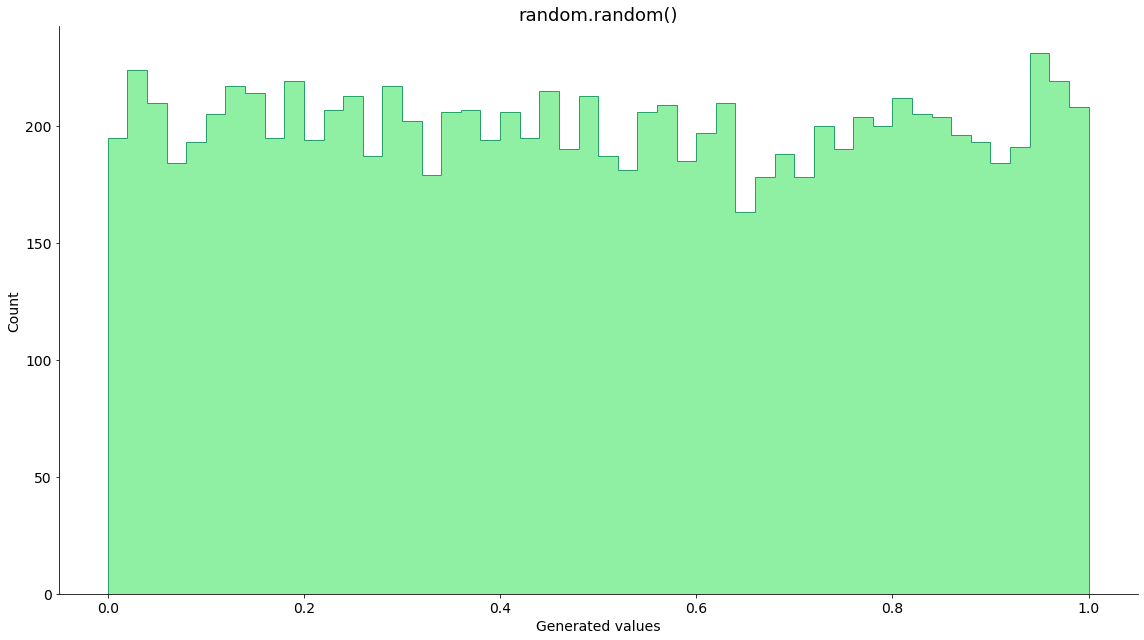

In [4]:
# Generate 10,000 floats
random_floats = [random.random() for _ in range(10000)]

# Plot
my_hist(
    values=random_floats,
    title="random.random()"
);

# DEV
plt.tight_layout()
plt.savefig(
    fname="plot1.png",
    format="png",
    dpi=125,
    facecolor=[1, 1, 1]
);

### uniform `float`: in a range `<a, b>`

In [5]:
random.uniform(a=0, b=1)

0.8845053876610179

**Example: Range <0, 1>**

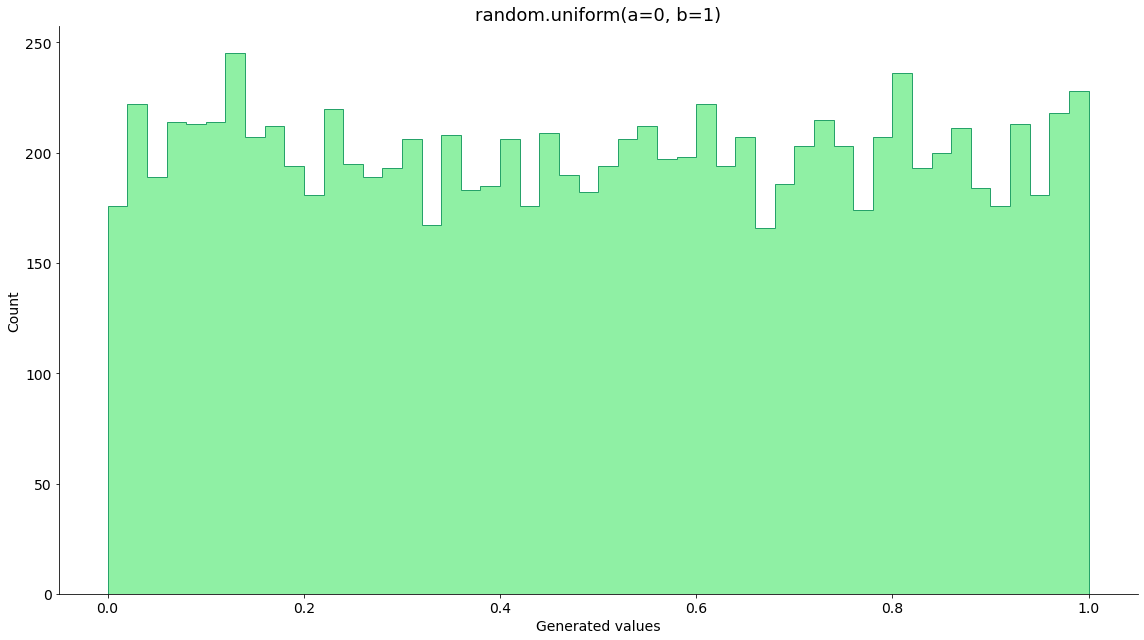

In [6]:
# Generate 10,000 floats
random_floats = [random.uniform(a=0, b=1) for _ in range(10000)]

# Plot
my_hist(
    values=random_floats,
    title="random.uniform(a=0, b=1)"
);

# DEV
plt.tight_layout()
plt.savefig(
    fname="plot2.png",
    format="png",
    dpi=125,
    facecolor=[1, 1, 1]
);

**Example: Range <-e, PI>**

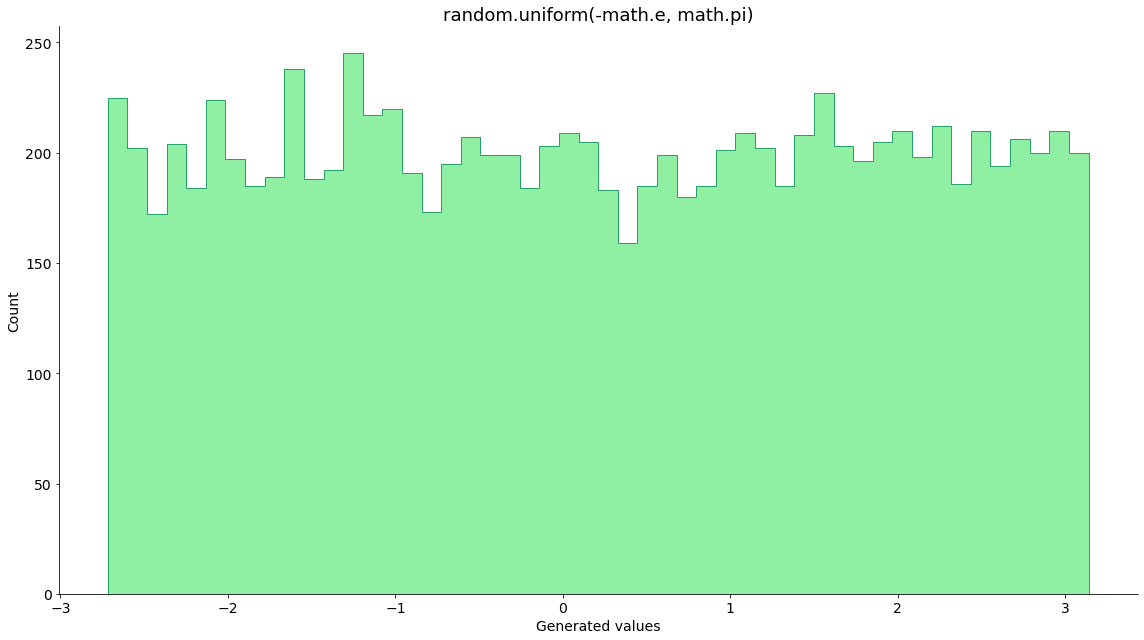

In [7]:
# Generate 10,000 floats
random_floats = [random.uniform(-math.e, math.pi) for _ in range(10000)]

# Plot
my_hist(
    values=random_floats,
    title="random.uniform(-math.e, math.pi)"
);

# DEV
plt.tight_layout()
plt.savefig(
    fname="plot3.png",
    format="png",
    dpi=125,
    facecolor=[1, 1, 1]
);

### normal `float`: `mu=0`, `sigma=1` (standard normal distribution)

In [8]:
# Generate one number - WAY 1
random.normalvariate(
    mu=0,
    sigma=1
)

0.22005737506085563

In [9]:
# Generate one number - WAY 2
random.gauss(
    mu=0,
    sigma=1
)

-0.35107789159539016

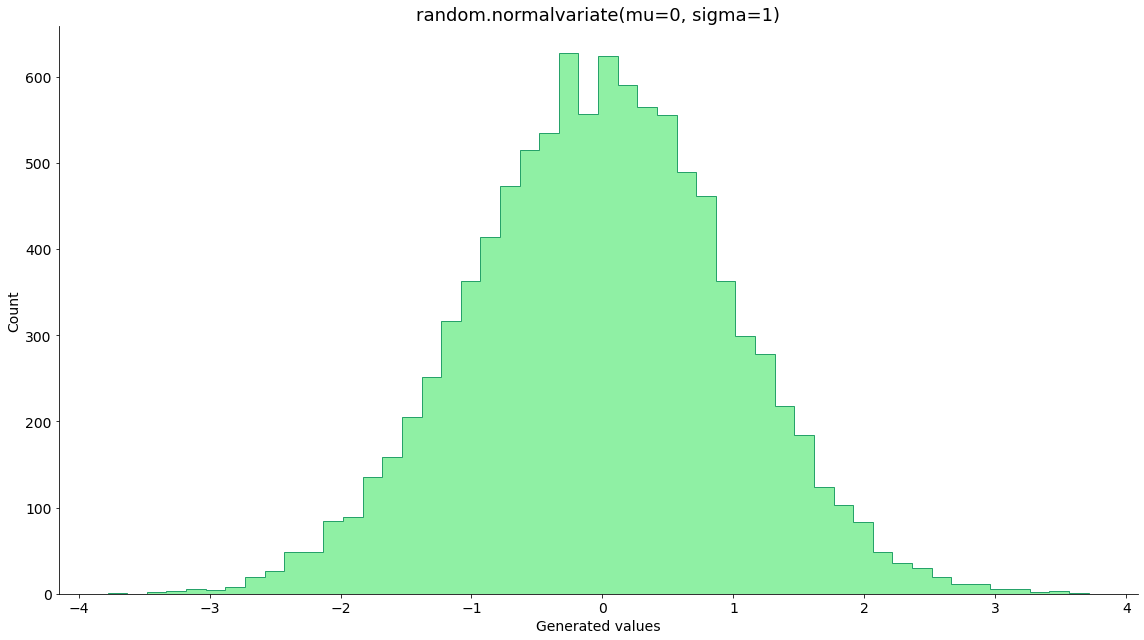

In [10]:
# Generate 10,000 floats
random_floats = [random.normalvariate(mu=0, sigma=1) for _ in range(10000)]

# Plot
my_hist(
    values=random_floats,
    title="random.normalvariate(mu=0, sigma=1)"
);

# DEV
plt.tight_layout()
plt.savefig(
    fname="plot4.png",
    format="png",
    dpi=125,
    facecolor=[1, 1, 1]
);

### other distributions

* Traingular
* Expotential
* Weibull

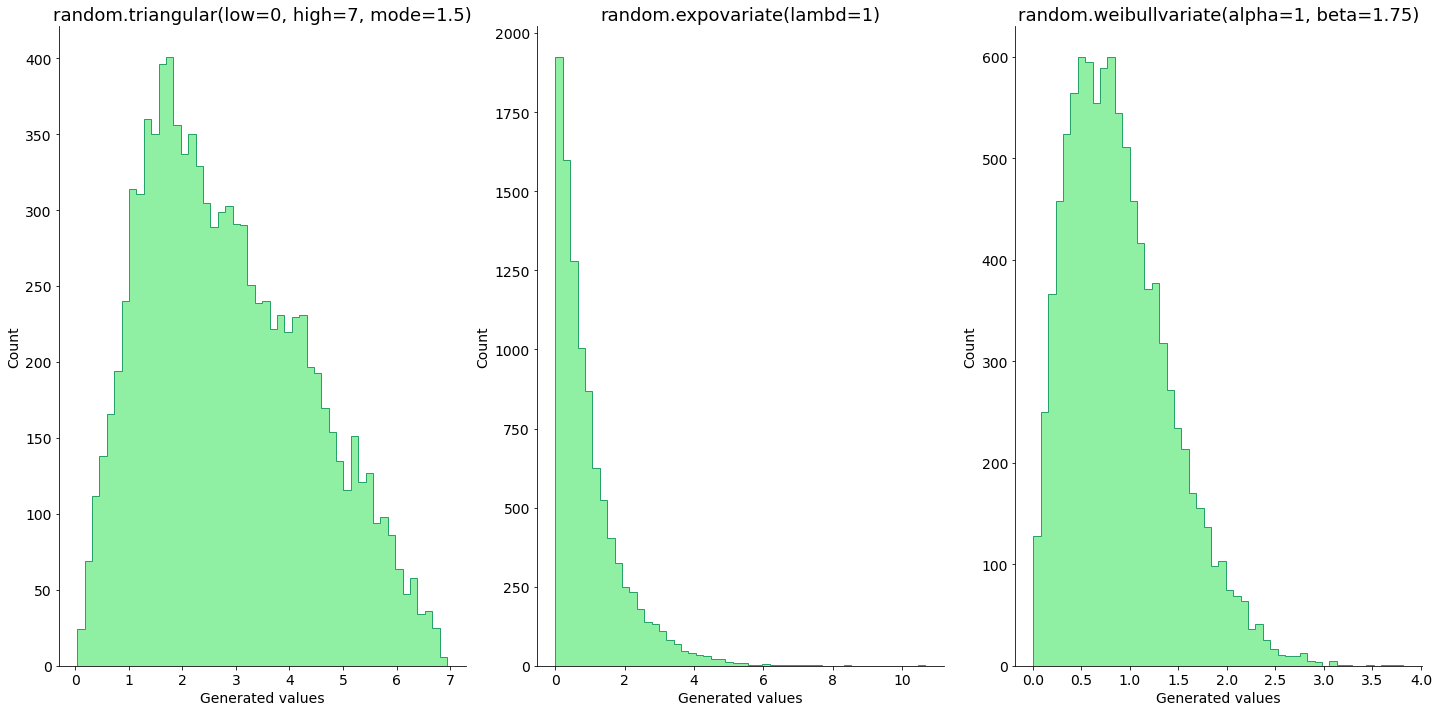

In [11]:
distributions = {
    "random.triangular(low=0, high=7, mode=1.5)": [random.triangular(low=0, high=7, mode=1.5) for _ in range(10000)],
    "random.expovariate(lambd=1)": [random.expovariate(lambd=1) for _ in range(10000)],
    "random.weibullvariate(alpha=1, beta=1.75)": [random.weibullvariate(alpha=1, beta=1.75) for _ in range(10000)]
}

fig, axs = plt.subplots(
    1, len(distributions),
    figsize=(20, 10),
    facecolor="white"
)

for key, ax in zip(distributions, axs):
    my_hist(
        ax=ax,
        values=distributions[key],
        title=key
    )

# DEV
plt.tight_layout()
plt.savefig(
    fname="plot5.png",
    format="png",
    dpi=125,
    facecolor=[1, 1, 1]
);

## Generate random `int`

`int` numbers are always generated using uniform distribution

### `int` in a range <0, upper_limit) 

In [12]:
# <0, 9>
random.randrange(10)

9

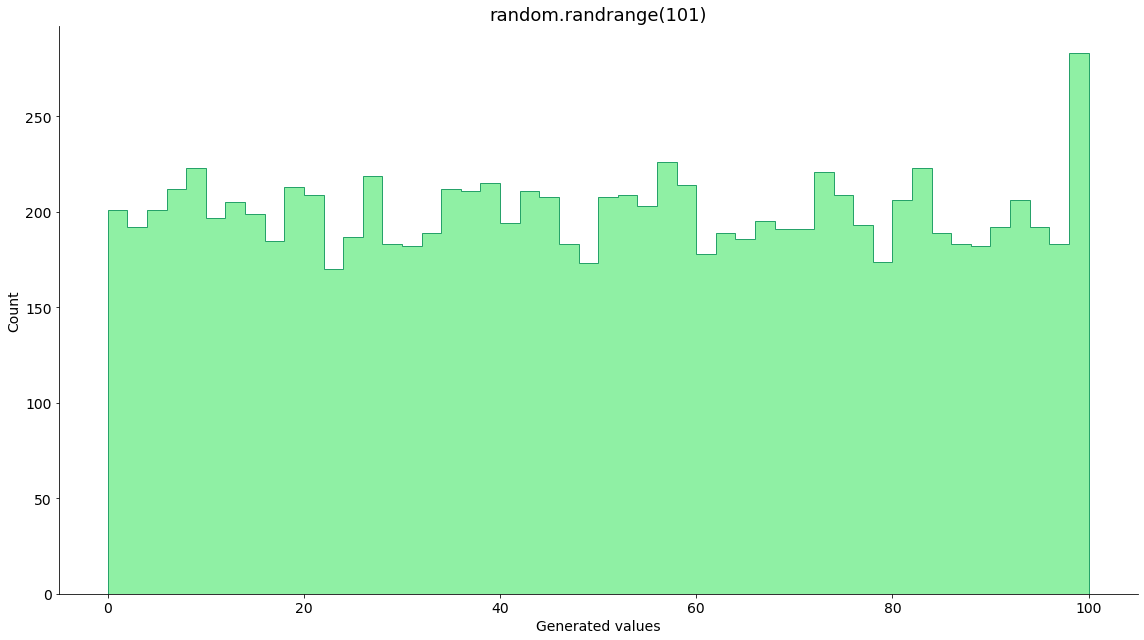

In [13]:
# Generate list of values
random_ints = [random.randrange(101) for _ in range(10000)]

# Plot
my_hist(
    values=random_ints,
    title="random.randrange(101)"
);

# DEV
plt.tight_layout()
plt.savefig(
    fname="plot6.png",
    format="png",
    dpi=125,
    facecolor=[1, 1, 1]
);

In [14]:
# Confirm the value of 101 was never generated (since it's an open range)
max(random_ints)

100

### `int` in a specified range <a, b)

In [15]:
[random.randrange(-20, 20) for _ in range(16)]

[-19, -12, 14, 13, -4, 1, 16, 0, 3, -11, 7, 11, 19, 0, -19, 0]

**Note:**

```python
random.randint(a, b)¶
Return a random integer N such that a <= N <= b. Alias for randrange(a, b+1)
```

### `int` in a specified range <a, b) with a step 

In [16]:
[random.randrange(50, 100, 5) for _ in range(15)]

[85, 65, 95, 70, 75, 95, 80, 65, 50, 95, 70, 65, 95, 65, 95]

### only even `int` in a specified range <a, b)

In [17]:
[random.randrange(50, 100, 2) for _ in range(15)]

[52, 90, 86, 58, 52, 58, 92, 92, 88, 64, 56, 68, 94, 88, 82]

### only odd `int` in a specified range <a, b)

In [18]:
[random.randrange(51, 100, 2) for _ in range(15)]

[59, 77, 73, 95, 79, 93, 71, 99, 69, 93, 99, 67, 61, 77, 71]

## Sample data - without replacement

### draw unique items from my list of values

In [19]:
my_values = [*"abc", *[1, 2, 3]]
my_values

['a', 'b', 'c', 1, 2, 3]

In [20]:
n  = 4  # number of samples to take
random.sample(my_values, n)

['a', 'c', 2, 3]

You can't draw a sample greater than the size of a population.

In [21]:
random.sample(my_values, len(my_values)+1)

ValueError: Sample larger than population or is negative

### draw a single item from my list of values

In [22]:
my_values

['a', 'b', 'c', 1, 2, 3]

In [23]:
# This returns the value directly
random.choice(my_values)

3

In [24]:
# This returns a LIST with a result
random.sample(my_values, 1)

[3]

### draw unique numbers from a range of values

In [25]:
# in a range from <0, 20)
n  = 5  # number of samples to take
random.sample(
    range(20), 
    n
)

[8, 6, 11, 18, 1]

## Sample data - with replacement

### without weights

In [26]:
my_values

['a', 'b', 'c', 1, 2, 3]

In [27]:
n  = 12  # number of samples to take
random.choices(my_values, k=n)

[2, 'c', 'b', 1, 'b', 'a', 'b', 'c', 'b', 2, 'b', 1]

### with weights

`random.choices()` also accepts `weight` parameter to provide relative weight for each item.

In [28]:
my_values_1 = [1, 2, 3]
n  = 100  # number of samples to take
r = random.choices(
    my_values_1,
    weights=[0.5, 0.4, 0.1],  # 1: 50%, 2: 40%, 3: 10%
    k=n
)

In [29]:
for i in my_values_1:
    print(f"{i} (count: {r.count(i)}) - {r.count(i)/len(r): .0%}")

1 (count: 41) -  41%
2 (count: 49) -  49%
3 (count: 10) -  10%


## Shuffling

* shuffling is `in place`

### mutable objects

In [30]:
my_values

['a', 'b', 'c', 1, 2, 3]

In [31]:
random.shuffle(my_values)

my_values

['c', 3, 1, 2, 'a', 'b']

### immutable objects

In [32]:
my_tuple = 10, 20, 30, "x", "y", "z"
my_tuple

(10, 20, 30, 'x', 'y', 'z')

In [33]:
random.shuffle(my_tuple)  # thows an error

TypeError: 'tuple' object does not support item assignment

In [34]:
# But it returns a list
random.sample(
    my_tuple,
    k=len(my_tuple)
)

[10, 30, 'x', 20, 'z', 'y']

## Reproducability

In [35]:
random.seed(0)
random.random()

0.8444218515250481

In [36]:
random.seed(0)
random.random()

0.8444218515250481

In [37]:
random.seed(0)
random.random()

0.8444218515250481